In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/drash/OneDrive/Desktop/PythonSQL/Crime.csv")

df

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,4125
2,ANDHRA PRADESH,CHITTOOR,2001,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,6507
...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,60
9013,LAKSHADWEEP,TOTAL,2012,60
9014,PUDUCHERRY,KARAIKAL,2012,787
9015,PUDUCHERRY,PUDUCHERRY,2012,3494


In [3]:
df.head()

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,4125
2,ANDHRA PRADESH,CHITTOOR,2001,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,6507


In [4]:
df.describe()

,YEAR,TOTAL IPC CRIMES
count,9017.000000,9017.000000
mean,2006.629034,5310.115116
std,3.463623,18524.381119
min,2001.000000,0.000000
25%,2004.000000,853.000000
50%,2007.000000,2096.000000
75%,2010.000000,3972.000000
max,2012.000000,220335.000000


In [5]:
df.shape

(9017, 4)

# Checking NAN Values

In [6]:
df.isnull().sum()

STATE/UT            0
DISTRICT            0
YEAR                0
TOTAL IPC CRIMES    0
dtype: int64

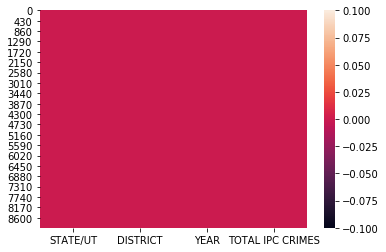

In [7]:
sns.heatmap(df.isnull())

No NAN values present

# Checking ?

In [8]:
(df=='?').sum()

STATE/UT            0
DISTRICT            0
YEAR                0
TOTAL IPC CRIMES    0
dtype: int64

# Label Encoder

In [9]:
# Converting non numeric data to numeric for data analysis

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['STATE/UT'] = le.fit_transform(df['STATE/UT'].astype(str))
df['DISTRICT'] = le.fit_transform(df['DISTRICT'].astype(str))

In [10]:
df.head()

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES
0,1,3,2001,4154
1,1,28,2001,4125
2,1,154,2001,5818
3,1,172,2001,3140
4,1,220,2001,6507


# Bivarient Analysis

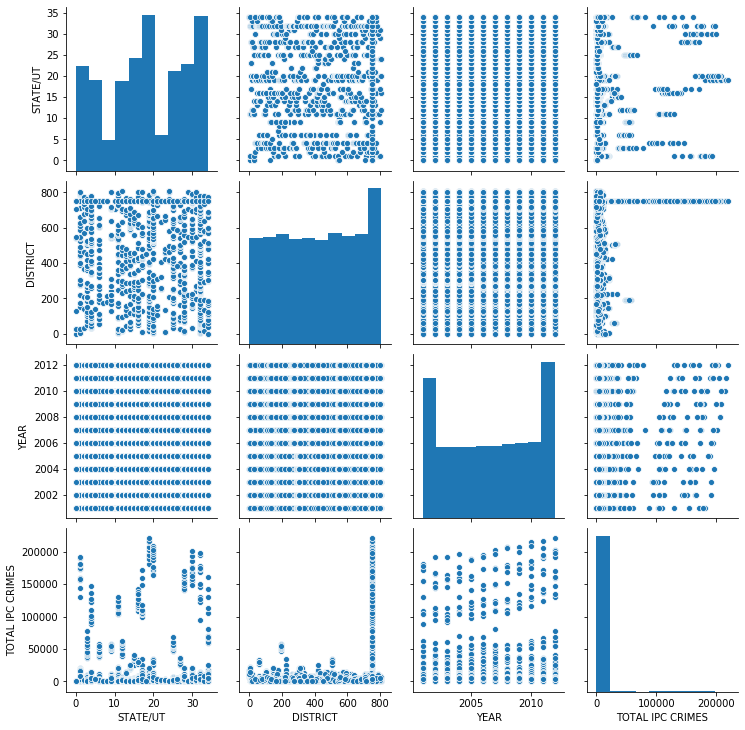

In [11]:
sns.pairplot(df )

Observations
1. District with value around 800 has the highest IPC crimes
2. There seems to be a gradual increase in total IPC crimes between 2001 and 2010

In [12]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'TOTAL IPC CRIMES'], dtype='object')

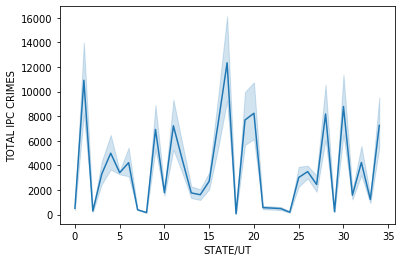

In [13]:
sns.lineplot(x='STATE/UT' , y = 'TOTAL IPC CRIMES' , data = df)

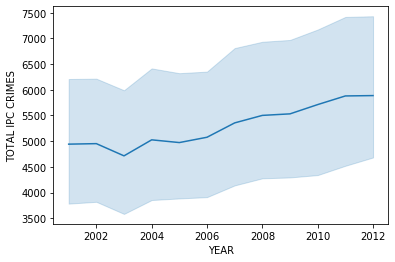

In [14]:
sns.lineplot(x='YEAR' , y = 'TOTAL IPC CRIMES' , data = df)

# Gradual increase in crimes ae seen over the period of 10 years from 2001 to 2010

# Correlation

In [15]:
df.corr()

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES
STATE/UT,1.000000,-0.056215,-0.005635,-0.002005
DISTRICT,-0.056215,1.000000,-0.000987,0.176049
YEAR,-0.005635,-0.000987,1.000000,0.019805
TOTAL IPC CRIMES,-0.002005,0.176049,0.019805,1.000000


Observations:
    1. Year and Total IPC crimes are positively related

# Finding and Removing Outliers

In [43]:
col_list = df.columns.values

ncols = 10
nrows = 12

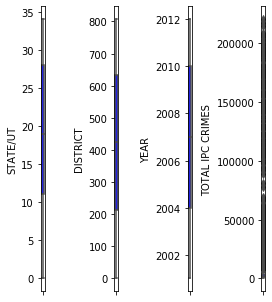

In [44]:

plt.figure(figsize = (ncols, 5*ncols))
for i in range( 0 , len(col_list)):
    plt.subplot(nrows , ncols , i+1)
    sns.boxplot(df[col_list[i]] , color = 'blue' , orient = 'v')
    plt.tight_layout()

Outliers are present in total IP crimes

In [45]:
from scipy.stats import zscore


z = np.abs(zscore(df))

df_new = df[(z<3).all(axis = 1) ]

df_new

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES
0,1,3,2001,4154
1,1,28,2001,4125
2,1,154,2001,5818
3,1,172,2001,3140
4,1,220,2001,6507
...,...,...,...,...
9012,18,453,2012,60
9013,18,753,2012,60
9014,26,382,2012,787
9015,26,589,2012,3494


In [46]:
# Outliers have been removed using zcore in the df_new


df.shape , df_new.shape

((9017, 4), (8880, 4))

In [47]:
# Separating attributes from target variable for analysis

x1 = df_new.iloc[: , 0:-1]

x1

,STATE/UT,DISTRICT,YEAR
0,1,3,2001
1,1,28,2001
2,1,154,2001
3,1,172,2001
4,1,220,2001
...,...,...,...
9012,18,453,2012
9013,18,753,2012
9014,26,382,2012
9015,26,589,2012


In [48]:
x1.shape

(8880, 3)

# Checking Skewness

In [49]:
x1.skew()

# No skewness is visible since values are less than 0.55

STATE/UT   -0.158080
DISTRICT   -0.048021
YEAR       -0.044052
dtype: float64

In [50]:
x = x1

In [51]:
# Separating attributes from target variable for analysis

y = df_new.iloc[:,-1]

y

0       4154
1       4125
2       5818
3       3140
4       6507
        ... 
9012      60
9013      60
9014     787
9015    3494
9016    4281
Name: TOTAL IPC CRIMES, Length: 8880, dtype: int64

In [52]:
x1.shape , y.shape

((8880, 3), (8880,))

# Data Analysis - Linear Regression Model

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 43 , test_size = 0.20)

In [54]:
x_train.shape ,x_test.shape,y_train.shape,y_test.shape

((7104, 3), (1776, 3), (7104,), (1776,))

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso

In [56]:
lreg = LinearRegression()
knr = KNeighborsRegressor()
ls = Lasso()

In [57]:
models = []
models.append(('KNeighborsRegressor' , knr))
models.append(('LinearRegression' , lreg))
models.append(('Lasso' , ls))

models

[('KNeighborsRegressor',
  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform')),
 ('LinearRegression',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)),
 ('Lasso',
  Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
        normalize=False, positive=False, precompute=False, random_state=None,
        selection='cyclic', tol=0.0001, warm_start=False))]

In [58]:
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score

In [59]:
lreg.fit(x_train,y_train)
pre = lreg.predict(x_test)
r2 = r2_score(y_test,pre)
rme = np.sqrt(mean_squared_error(y_test,pre))

print(r2 , "\n" , rme)

0.006288305286708318 
 4812.641953006254


In [60]:
Model = []
r2score = []
cv = []
rmse = []

for name,model in models:
    print("***************************" , name , "***************************\n")
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred = model.predict(x_test)
    print("\n")
    r2s = r2_score(y_test,pred)
    print("r2 score :" , r2s)
    r2score.append(r2s*100)
    print("\n")
    sc = cross_val_score(model , x, y , cv = 10 , scoring = 'r2')
    print("Cross_Val_score : " , sc)
    cv.append(sc*100)
    print("\n")
    rme = np.sqrt(mean_squared_error(y_test,pred))
    print("RMSE : " , rme)
    rmse.append(rme)
    print("\n\n")

*************************** KNeighborsRegressor ***************************

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


r2 score : 0.47116574288238267


Cross_Val_score :  [0.61841173 0.63506105 0.70646658 0.68394378 0.70352606 0.68138883
 0.66737484 0.62845149 0.63706978 0.52285215]


RMSE :  3510.8570132326477



*************************** LinearRegression ***************************

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


r2 score : 0.006288305286708318


Cross_Val_score :  [ 0.0043186   0.00395252  0.00736353  0.00437173  0.00606855  0.00812702
  0.00484867  0.0039072   0.00198999 -0.00712224]


RMSE :  4812.641953006254



*************************** Lasso ***************************

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute

In [61]:
result = pd.DataFrame({'Model' : Model , 'R2Score' : r2score , "RMSE" : rmse , "Cross_Val_Score" :cv})

result

,Model,R2Score,RMSE,Cross_Val_Score
0,KNeighborsRegressor,47.116574,3510.857013,"[61.84117268769207, 63.50610539923427, 70.6466..."
1,LinearRegression,0.628831,4812.641953,"[0.43186030732772496, 0.3952524087016629, 0.73..."
2,Lasso,0.629005,4812.637727,"[0.4318738725248461, 0.3959875817297287, 0.735..."


In [62]:
# Saving KNeighborsREgressor model as it has comapratively better r2score

knr.predict(x_test)

array([  79.4, 7450.2,  578. , ...,  440.4, 1441.4, 3702.8])

In [63]:
from sklearn.externals import joblib

# Save the model as a object file

joblib.dump(knr , 'crime.obj')

#Load the model from the file

dtc_from_joblib = joblib.load('crime.obj')

# Use the loaded model to make predictions

dtc_from_joblib.predict(x_test)

array([  79.4, 7450.2,  578. , ...,  440.4, 1441.4, 3702.8])